First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

<ipython-input-8-1dd3dde78122>:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
<ipython-input-8-1dd3dde78122>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

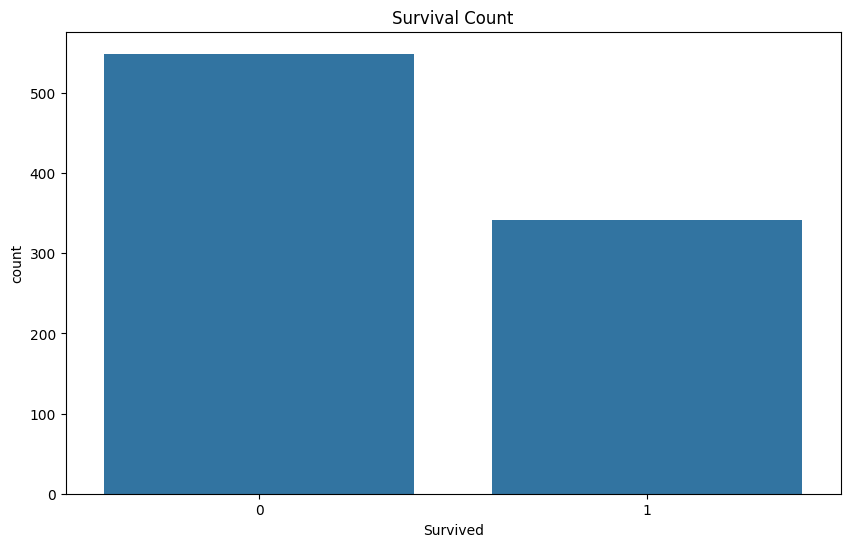

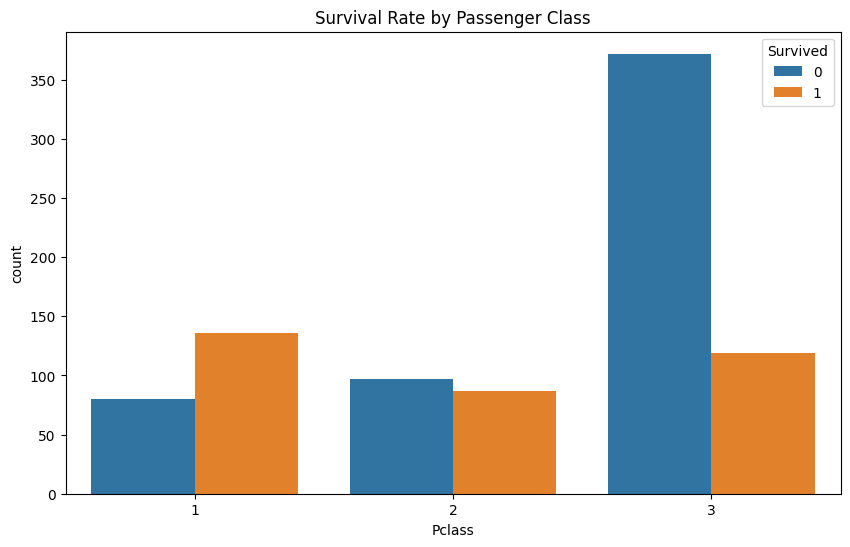

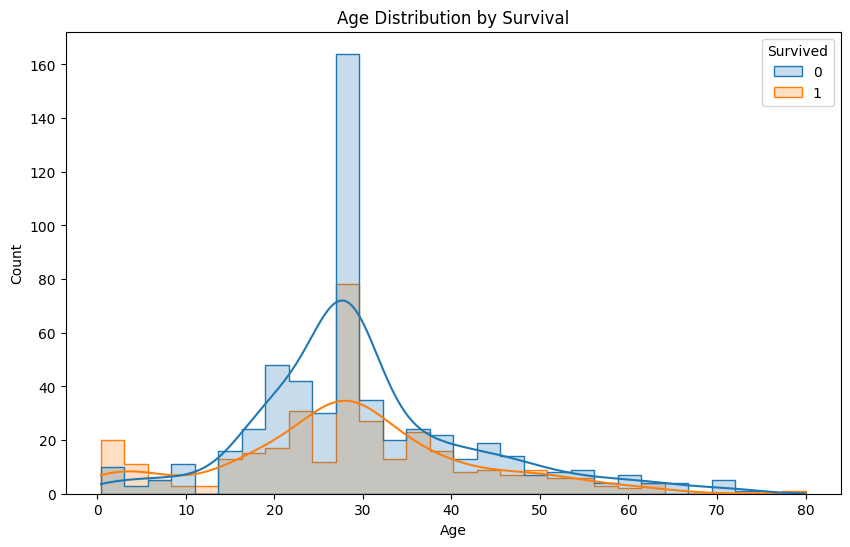

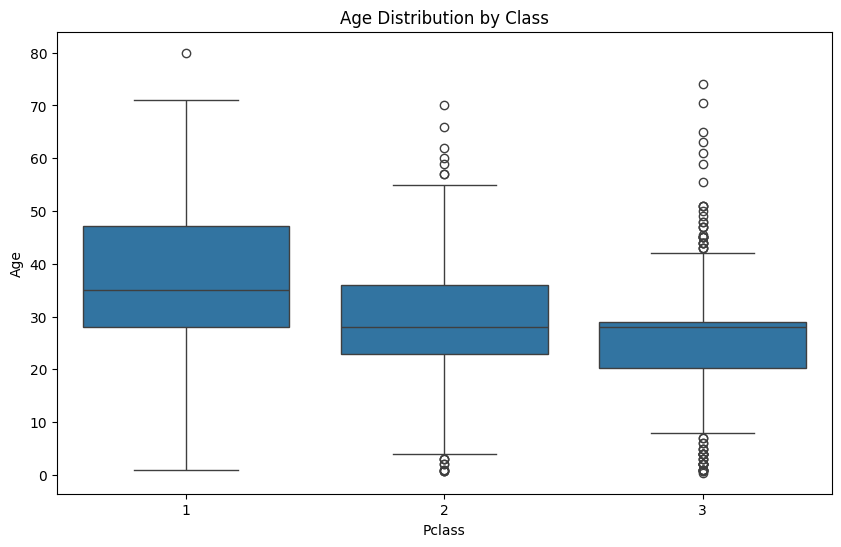

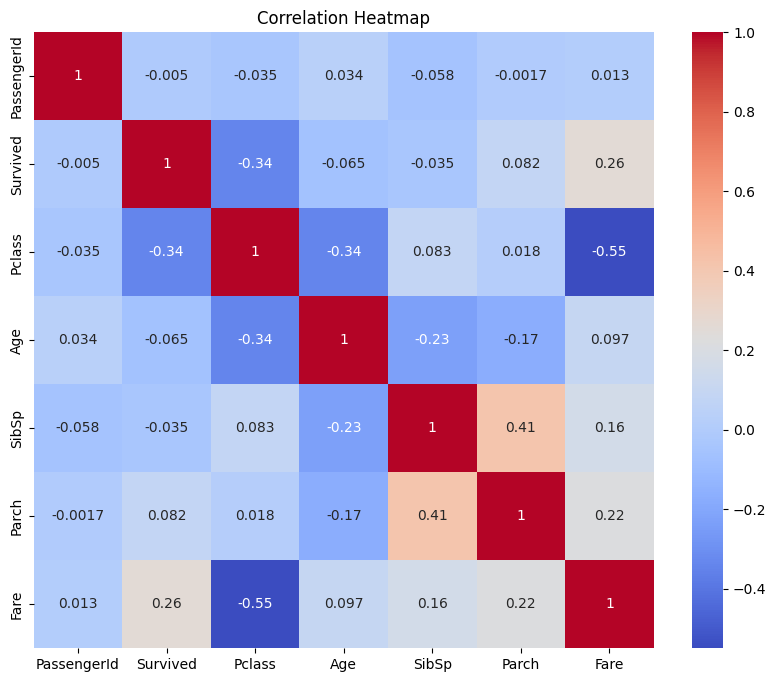

In [8]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
titanic = pd.read_csv('/content/drive/MyDrive/titanic.csv')  # Ensure this CSV is in the same directory or provide full path

# Check if the column 'Age' exists, if not, check for possible alternatives
if 'Age' not in titanic.columns:
    # Possible alternatives for 'Age' column name
    alternatives = ['age', 'Age ', ' Ag', 'age']  # Add any other suspected alternatives

    # Check if any alternative exists in the columns
    for alt in alternatives:
        if alt in titanic.columns:
            print(f"Found alternative column name: '{alt}'. Replacing it with 'Age'")
            titanic.rename(columns={alt: 'Age'}, inplace=True)
            break
    else:
        raise KeyError("Column 'Age' or any of its alternatives not found in the DataFrame.")

# Check if the column 'Survived' exists, if not, check for possible alternatives
if 'Survived' not in titanic.columns:
    # Possible alternatives for 'Survived' column name
    alternatives = ['survived', 'SURVIVED', 'Survived ']  # Add any other suspected alternatives

    # Check if any alternative exists in the columns
    for alt in alternatives:
        if alt in titanic.columns:
            print(f"Found alternative column name: '{alt}'. Replacing it with 'Survived'")
            titanic.rename(columns={alt: 'Survived'}, inplace=True)
            break
    else:
        raise KeyError("Column 'Survived' or any of its alternatives not found in the DataFrame.")


# Basic Info
print("First 5 rows:\n", titanic.head())
print("\nMissing values:\n", titanic.isnull().sum())
print("\nDataset description:\n", titanic.describe())

# Clean Data
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic.drop('Cabin', axis=1, inplace=True)  # Too many missing values

# Exploratory Data Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=titanic)
plt.title('Survival Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='Age', bins=30, kde=True, hue='Survived', element='step')
plt.title('Age Distribution by Survival')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=titanic)
plt.title('Age Distribution by Class')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()